In [1]:
import os
import requests

In [2]:
pdfs = {
    "Window": "https://www.westoxon.gov.uk/media/ksqgvl4b/10-design-guide-windows-and-doors.pdf",
    "Roofs": "https://www.westoxon.gov.uk/media/d3ohnpd1/9-design-guide-roofs-and-roofing-materials.pdf",
    "Extensions": "https://www.westoxon.gov.uk/media/pekfogvr/14-design-guide-extensions-and-alterations.pdf",
    "Greener": "https://www.westoxon.gov.uk/media/thplpsay/16-design-guide-greener-traditional-buildings.pdf",
    "Sustainable": "https://www.westoxon.gov.uk/media/nk5bvv0v/12-design-guide-sustainable-building-design.pdf"
}
output_dir = "dataset"
os.makedirs(output_dir, exist_ok=True)

for name, url in pdfs.items():
    response = requests.get(url)
    pdf_path = os.path.join(output_dir, f"{name}.pdf")
    with open(pdf_path, "wb") as f:
        f.write(response.content)



In [3]:
import os
from pdf2image import convert_from_path

def convert_pdfs_to_images(folder):
    pdf_files = [f for f in os.listdir(folder) if f.endswith('.pdf')]
    all_images = {}

    for doc_id, pdf_file in enumerate(pdf_files):
        pdf_path = os.path.join(folder, pdf_file)
        images = convert_from_path(pdf_path, dpi=100)
        all_images[doc_id] = images

    return all_images

all_images = convert_pdfs_to_images("dataset/")

#### All pdf converted in to images now lets display images

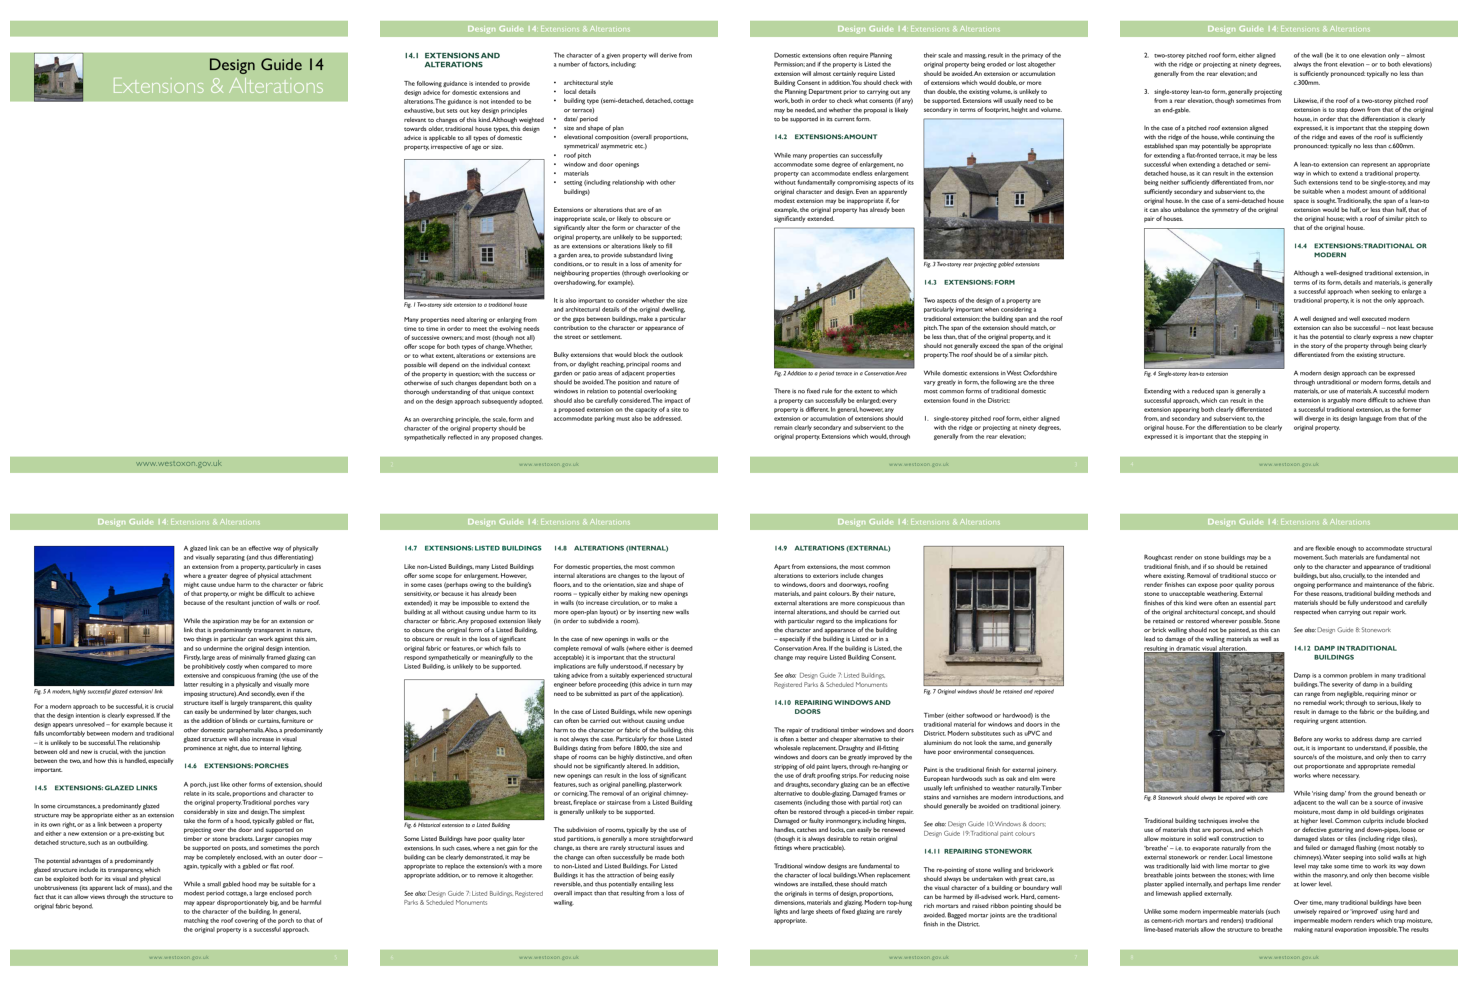

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,4,figsize=(15,10))

for i , ax in enumerate(axes.flat):
    img = all_images[0][i]
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.show()

#### Next --

> 1. We will initialize the RAG system with Byaldi and the document retrieval model, ColPali.
> 2. The ColPali model is a retrieval model that fetches documents by directly using the image, rather than breaking it down into a text-chunking process.

In [5]:
from byaldi import RAGMultiModalModel

colpali_model = RAGMultiModalModel.from_pretrained("vidore/colpali-v1.2")

Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

#### We will use this code to index out images and build the knowledge Base

In [6]:
colpali_model.index(
    input_path = "dataset/",
    index_name = "index_name",
    store_collection_with_index=False,
    overwrite=True
)

overwrite is on. Deleting existing index index_name to build a new one.
Indexing file: dataset/Extensions.pdf
Added page 1 of document 0 to index.
Added page 2 of document 0 to index.
Added page 3 of document 0 to index.
Added page 4 of document 0 to index.
Added page 5 of document 0 to index.
Added page 6 of document 0 to index.
Added page 7 of document 0 to index.
Added page 8 of document 0 to index.
Added page 9 of document 0 to index.
Added page 10 of document 0 to index.
Added page 11 of document 0 to index.
Index exported to .byaldi/index_name
Indexing file: dataset/Greener.pdf


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Added page 1 of document 1 to index.
Added page 2 of document 1 to index.
Added page 3 of document 1 to index.
Added page 4 of document 1 to index.
Added page 5 of document 1 to index.
Added page 6 of document 1 to index.
Added page 7 of document 1 to index.
Added page 8 of document 1 to index.
Added page 9 of document 1 to index.
Added page 10 of document 1 to index.
Added page 11 of document 1 to index.
Added page 12 of document 1 to index.
Added page 13 of document 1 to index.
Added page 14 of document 1 to index.
Added page 15 of document 1 to index.
Added page 16 of document 1 to index.
Added page 17 of document 1 to index.
Index exported to .byaldi/index_name
Indexing file: dataset/Roofs.pdf


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Added page 1 of document 2 to index.
Added page 2 of document 2 to index.
Added page 3 of document 2 to index.
Added page 4 of document 2 to index.
Added page 5 of document 2 to index.
Added page 6 of document 2 to index.
Added page 7 of document 2 to index.
Index exported to .byaldi/index_name
Indexing file: dataset/Sustainable.pdf


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Added page 1 of document 3 to index.
Added page 2 of document 3 to index.
Added page 3 of document 3 to index.
Added page 4 of document 3 to index.
Added page 5 of document 3 to index.
Added page 6 of document 3 to index.
Added page 7 of document 3 to index.
Added page 8 of document 3 to index.
Added page 9 of document 3 to index.
Added page 10 of document 3 to index.
Added page 11 of document 3 to index.
Added page 12 of document 3 to index.
Added page 13 of document 3 to index.
Index exported to .byaldi/index_name
Indexing file: dataset/Window.pdf


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Added page 1 of document 4 to index.
Added page 2 of document 4 to index.
Added page 3 of document 4 to index.
Added page 4 of document 4 to index.
Added page 5 of document 4 to index.
Added page 6 of document 4 to index.
Added page 7 of document 4 to index.
Added page 8 of document 4 to index.
Added page 9 of document 4 to index.
Added page 10 of document 4 to index.
Added page 11 of document 4 to index.
Index exported to .byaldi/index_name
Index exported to .byaldi/index_name


{0: 'dataset/Extensions.pdf',
 1: 'dataset/Greener.pdf',
 2: 'dataset/Roofs.pdf',
 3: 'dataset/Sustainable.pdf',
 4: 'dataset/Window.pdf'}

#### With the retrival model let try how the model retrive document from text query

In [7]:
query = "How should we design greener and sustainable house ?"
results = colpali_model.search(query, k = 2)
print(results)

[{'doc_id': 3, 'page_num': 9, 'score': 11.4375, 'metadata': {}, 'base64': None}, {'doc_id': 3, 'page_num': 11, 'score': 11.25, 'metadata': {}, 'base64': None}]


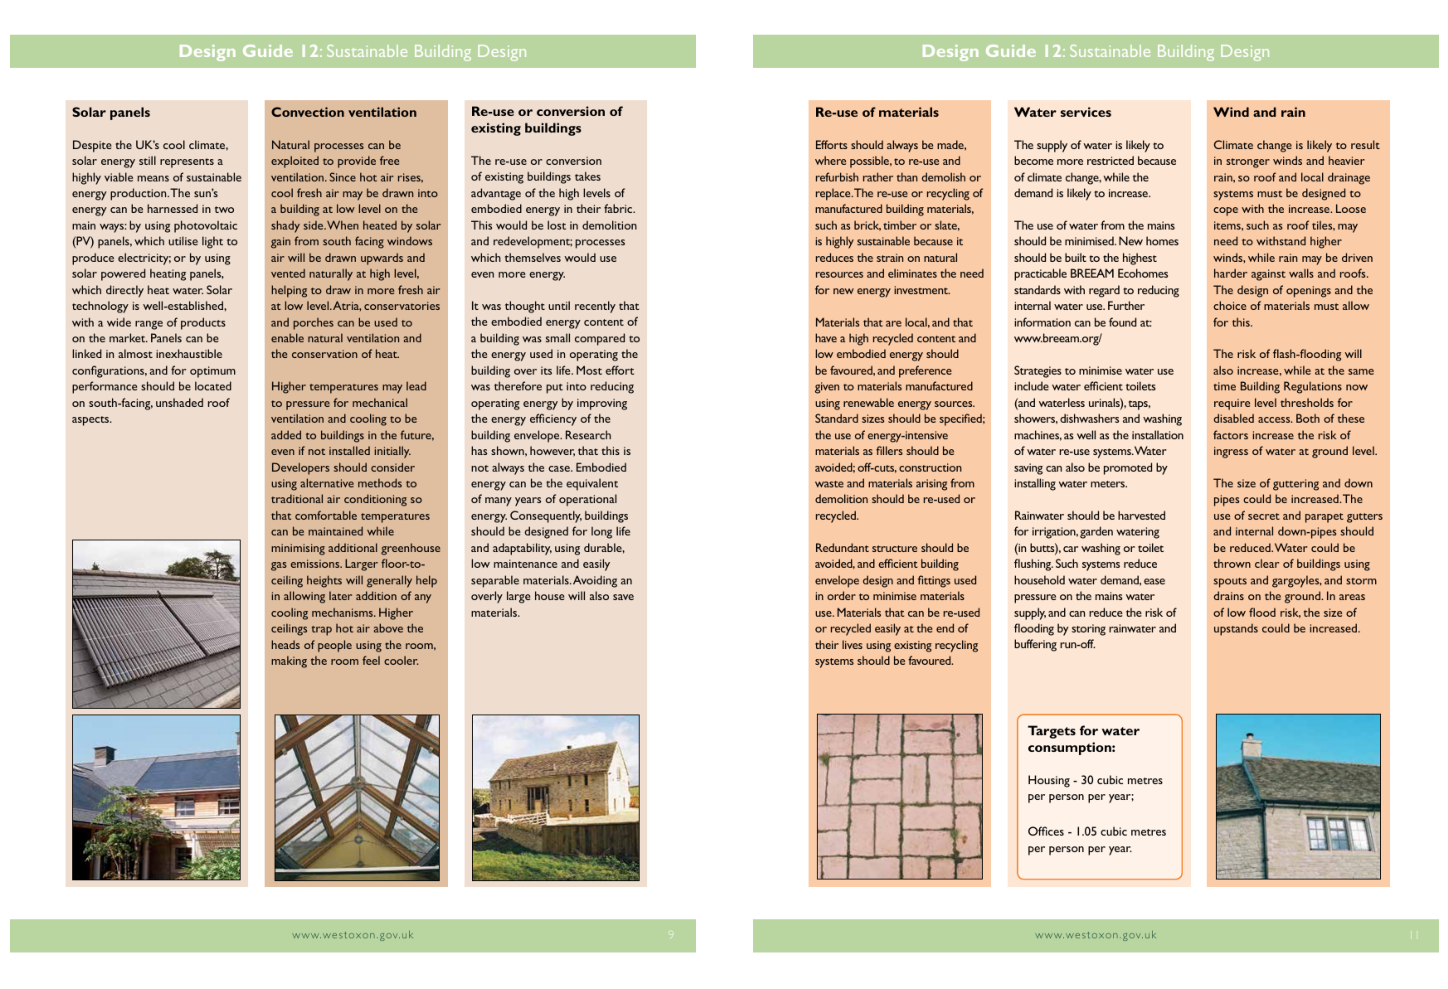

In [8]:
### Lets look in the documents retrival from output


def get_result_images(results, all_images):
    grouped_images = []
    for result in results:
        doc_id = result['doc_id']
        page_num = result['page_num']
        grouped_images.append(all_images[doc_id][page_num -1])
    return grouped_images

result_images = get_result_images(results, all_images)

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    img = result_images[i]
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()
    

#### The retrieval model successfully retrieves the appropriate document for our query.

#### Next, we will use Qwen-VL as our generative model.

> 1. Qwen-VL is a vision-language model that can understand our images and generate text output.

In [9]:
from transformers import Qwen2VLForConditionalGeneration, Qwen2VLProcessor
from qwen_vl_utils import process_vision_info
import torch

In [10]:


vl_model = Qwen2VLForConditionalGeneration.from_pretrained("Qwen/Qwen2-VL-7B-Instruct",
                                                          torch_dtype=torch.bfloat16)

`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

In [11]:
vl_model.cuda().eval()

Qwen2VLForConditionalGeneration(
  (visual): Qwen2VisionTransformerPretrainedModel(
    (patch_embed): PatchEmbed(
      (proj): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
    )
    (rotary_pos_emb): VisionRotaryEmbedding()
    (blocks): ModuleList(
      (0-31): 32 x Qwen2VLVisionBlock(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): VisionSdpaAttention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (mlp): VisionMlp(
          (fc1): Linear(in_features=1280, out_features=5120, bias=True)
          (act): QuickGELUActivation()
          (fc2): Linear(in_features=5120, out_features=1280, bias=True)
        )
      )
    )
    (merger): PatchMerger(
      (ln_q): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
      (mlp): Seq

In [12]:
### Next we will setup QwenVL image processor and set the pixel size fro GPU optimization

min_pixels = 256*256
mix_pixels = 1024*1024

vl_model_processor = Qwen2VLProcessor.from_pretrained(
    "Qwen/Qwen2-VL-7B-Instruct",
    max_pixels = mix_pixels
)


#### Then we will create out chat template for generative model


chat_template = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": result_images[0],
            },
             {
                 "type": "image",
                "image": result_images[1],
            },
            {
                "type": "text",
                "text": query
            },
        ],
    }
]


text  = vl_model_processor.apply_chat_template(chat_template, tokenize = False, add_generation_prompt = True)

In [13]:
### Lastly er setup the input processing system for the images and the text to the out put

images_inputs, _ = process_vision_info(chat_template)
inputs   = vl_model_processor(
    text = [text],
    images = images_inputs,
    padding = True,
    return_tensors = "pt"
)

inputs = inputs.to("cuda")

In [14]:
### NOw every thing is ready we will try our multimodelRAG System

generated_ids = vl_model.generate(**inputs, max_new_tokens=100) 

generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = vl_model_processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)

print(output_text[0]) 

OutOfMemoryError: CUDA out of memory. Tried to allocate 6.06 GiB. GPU 0 has a total capacity of 8.00 GiB of which 0 bytes is free. Including non-PyTorch memory, this process has 17179869184.00 GiB memory in use. Of the allocated memory 21.81 GiB is allocated by PyTorch, and 310.57 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"